In [41]:
import numpy as np
from scipy.special import factorial, beta
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
opazeni = np.array([3, 0, 2, 1, 3, 2, 1, 0, 2, 2])

In [61]:
# Metoda momentov ocena theta
theta_1 = 7. / 6. - opazeni.mean() / 2
print('Ocena parametra po metodi momentov je', theta_1)

# Ocena standardne napake
n = opazeni.shape[0]
MSE = 1/(n-1) * ((opazeni - opazeni.mean())**2).sum()
MSE = MSE / n
SE = np.sqrt(MSE)
print('Ocena za standardno napako ocene parametra je', SE)

Ocena parametra po metodi momentov je 0.3666666666666667
Ocena za standardno napako ocene parametra je 0.33993463423951903


In [64]:
# Metoda največjega verjetja
# Na roke izračunamo, da je ocena za parameter enaka:
theta_2 = 2/5

# Fisherjeva informacija se glasi
FI = 4/(theta_2**2) + 6/((1-theta_2)**2)

# Ocena za standardno napako je torej
SE = 1 / np.sqrt(FI)
print('Standardna napaka za oceno preko metode največjega verjetja je', SE)

Standardna napaka za oceno preko metode največjega verjetja je 0.15491933384829668


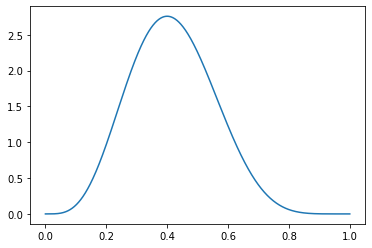

In [65]:
# Bayesov način za enakomerno porazdeljen parameter theta
stevilo_tock = 1000
x = np.linspace(0, 1, stevilo_tock)
f_theta = factorial(11) / (factorial(4) * factorial(6)) * (x**4) * (1-x)**6

# Modus je maksimum gostote porazdelitve
modus = 2/5

# Pričakovana vrednost
mi = 5/12

# Izris gostote pričakovane vrednosti
fig, ax = plt.subplots()
ax.plot(x, f_theta)

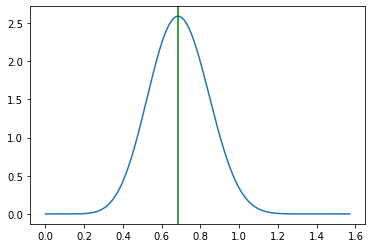

In [39]:
# Parameter fi
x = np.linspace(0, np.pi/2, stevilo_tock)
modus_fi = np.arctan(np.sqrt(2/3))
f_fi = 2/(beta(9/2, 13/2)) * (np.sin(x)**8) * (np.cos(x)**12)

# Izris gostote
fig2, ax2 = plt.subplots()
ax2.plot(x, f_fi)
ax2.axvline(modus_fi, color='g')

In [54]:
# Izračun pričakovane vrednosti
mi_fi = integrate.quad(lambda t: t*np.sin(t)**8 * np.cos(t)**12, 0, np.pi/2)
mi_fi = 2 / (beta(9/2, 13/2)) * mi_fi[0]

0.005116731755293591

In [56]:
# Pretvorba ocen v parameter theta iz fi
mi_theta = np.sin(mi_fi)**2
modus_theta = np.sin(modus_fi)**2
print('Nova ocena za theta preko modusa je', modus_theta)
print('Nova ocena za theta preko pričakovane vrednosti je', mi_theta)

Nova ocena za theta preko modusa je 0.4
Nova ocena za theta preko pričakovane vrednosti je 0.40501850142112744
